# Load and plot RMSE's

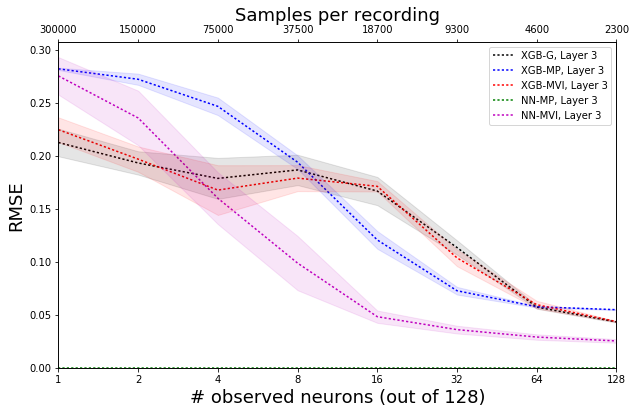

In [14]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/RMSEs_XGB_vs_XGBMP'
x = [2**x for x in range(8)]
x = range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


networks =['NN']
nRecordings =10
methods =['XGB', 'XGBMP', 'XGBMVI', 'NNMP', 'NNMVI']
methodLabels =['XGB-G', 'XGB-MP', 'XGB-MVI', 'NN-MP', 'NN-MVI']
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']
iLayer=2 

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        #for iLayer in range(0,len(layers), 2):
        fName = 'results/' + methods[iMethod] + '_RMSES_Layer' + str(iLayer) + 'nRec' + \
                str(nRecordings) + networks[iNetwork] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
        y = np.mean(np.mean(rmses, axis=1), axis=0)
        error = np.std(np.mean(rmses, axis=1), axis=0)
        ax1.plot(x, y, label=methodLabels[iMethod]+', Layer '+ str(iLayer+1), 
                 color=colors[iMethod],linestyle=lstyles[iLayer])
        pl.fill_between(x, y-error, y+error, alpha=0.1, color  = colors[iMethod] )


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=18)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(8)])
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

ax2.set_xticklabels(nSamples)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
ax1.set_ylim([0, yl[1]])
#ax1.set_ylim([0, .5])

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


In [13]:
np.mean(rmses, axis=1)

array([[ 0.27887344,  0.23827715,  0.24183415,  0.22053451,  0.2233669 ,
         0.1968813 ,  0.14051671,  0.10623183],
       [ 0.26927285,  0.24891047,  0.23894544,  0.23023838,  0.22131225,
         0.1787136 ,  0.13483665,  0.10571372],
       [ 0.27177312,  0.2538567 ,  0.22995265,  0.22645974,  0.21680158,
         0.18921551,  0.14151141,  0.10729303],
       [ 0.26697793,  0.24935112,  0.23720299,  0.23244844,  0.22769259,
         0.19310261,  0.1423119 ,  0.10690698],
       [ 0.27923544,  0.24406156,  0.2416776 ,  0.23125791,  0.21566311,
         0.18592747,  0.13296202,  0.10653266]])